# **Fake News Detection System**

## **Overview**

Misinformation and fake news contribute to poor decision-making in politics, health, finance, and more. This project aims to build a machine learning-based solution that can detect fake news based on its content.

The spread of misinformation, especially through social media and online platforms, has become a major global concern. This project addresses that issue by applying machine learning to detect fake news using the content of the news article alone.

A sample dataset of real and fake news headlines was used to train a Logistic Regression classifier. Text features were extracted using the TF-IDF vectorization technique, allowing the model to learn word patterns common in fake vs real news.

The resulting system can predict whether a given news snippet is real or fake, and can be deployed as a web app using Streamlit for interactive use.

## **Objective**
To develop a machine learning model that can accurately classify news articles or headlines as fake or real using Natural Language Processing (NLP) techniques. The goal is to combat misinformation by creating a simple, accessible tool that detects fake news based on text content.

## **Learning Outcomes**
By completing this project, I gained the following skills and insights:

* Text preprocessing and how to prepare textual data for machine learning

*  Application of TF-IDF to convert text into numerical features

*  Training and evaluating a Logistic Regression model for classification

* Using Scikit-learn for building NLP pipelines

* Saving and loading machine learning models using Joblib

* Building a simple front-end app using Streamlit

* Understanding the real-world impact of NLP in detecting misinformation



##**Fake News Detection Using Machine Learning**
**Overview**

This project leverages natural language processing (NLP) and machine learning to classify news content as either fake or real. The model is trained using TF-IDF for feature extraction and Logistic Regression for classification.

**Objective**

To create a lightweight, accessible system that detects misinformation and helps users verify the authenticity of news content.

**Technologies Used**

    Python

    Scikit-learn

    Pandas

    TF-IDF

    Logistic Regression

    Streamlit

**How It Works**

    User enters a news headline or article.

    The system processes and analyzes the text.

    It returns a prediction: FAKE or REAL, along with a confidence score.

**Key Takeaways**

    Learned how to clean and vectorize text using TF-IDF

    Trained and evaluated a machine learning classifier

    Deployed a simple web app using Streamlit

    Gained hands-on experience in real-world NLP application

**Future Plans**

    Expand the dataset for greater accuracy

    Integrate Nigerian news sources

    Explore advanced models like BERT

    Apply similar techniques to food misinformation and health-related claims



**Step 1: Define the problem**

Minitask

Write a brief paragraph on how a fake news detection system can benefit users and government organizations




A fake news detection system can greatly benefit both users and government organizations by helping to combat the spread of misinformation. For users, it provides a reliable way to verify the credibility of online content, protecting them from being misled or manipulated. For governments, such systems are essential tools in safeguarding public trust, especially during critical times like elections, health crises, or national emergencies. By quickly identifying and flagging false or misleading information, these systems support informed decision-making, enhance media literacy, and contribute to a more transparent and secure information environment.

**Step 2: Data Collection**

Task:

Collect the dataset required for building the fake news detection system.

Mini-task:

Load the dataset and inspect the first few rows to understand its structure.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

true_df = pd.read_csv('/content/drive/MyDrive/True.csv')
fake_df = pd.read_csv('/content/drive/MyDrive/Fake.csv')

true_df.head(2)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"


In [3]:
fake_df.head(2)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"


**Step 3: Exploratory Data Analysis (EDA)**

Task:

Analyze the dataset to understand the distribution of the real and fake news dataset and explore user behavior.

Mini-task:

Plot the distribution of book ratings using a histogram or bar chart.

Hint:

Use seaborn or matplotlib to visualize the distribution of ratings.

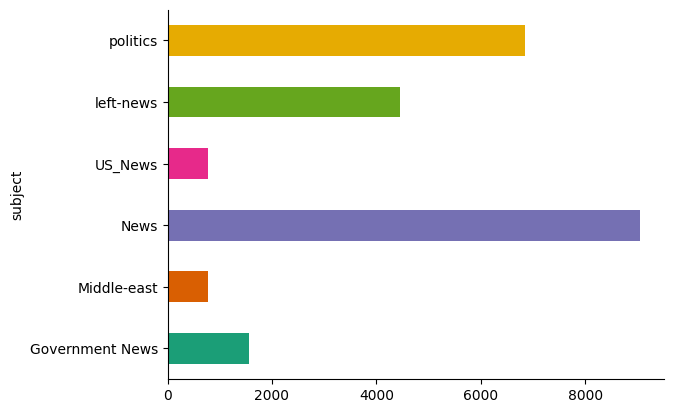

In [4]:


from matplotlib import pyplot as plt
import seaborn as sns
fake_df.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

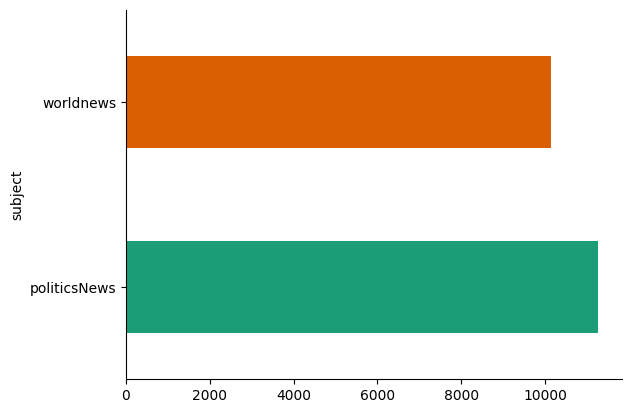

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
true_df.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [32]:

# Add labels
fake_df['label'] = 'FAKE'
true_df['label'] = 'REAL'

# Combine them
df = pd.concat([fake_df, true_df], ignore_index=True)

# Shuffle the rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Combine title + text
df['content'] = df['title'] + " " + df['text']

df.head()


,title,text,subject,date,label,content
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",FAKE,Ben Stein Calls Out 9th Circuit Court: Committ...
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",REAL,Trump drops Steve Bannon from National Securit...
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",REAL,Puerto Rico expects U.S. to lift Jones Act shi...
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",FAKE,OOPS: Trump Just Accidentally Confirmed He Le...
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",REAL,Donald Trump heads for Scotland to reopen a go...


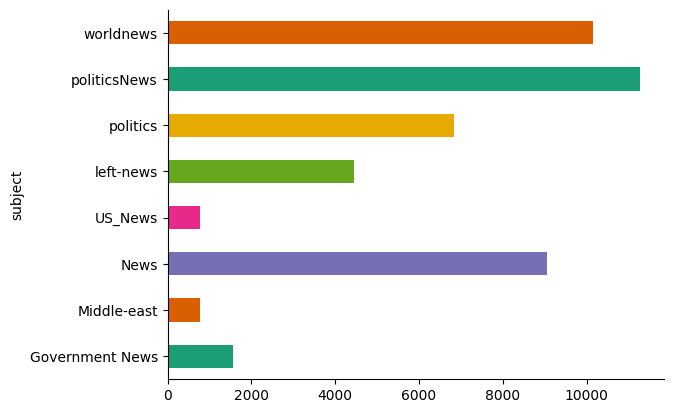

In [33]:


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

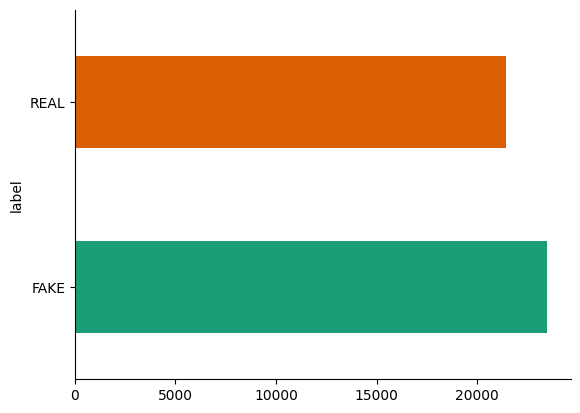

In [7]:


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label', 'content'], dtype='object')

In [35]:
df['subject']

,subject
0,US_News
1,politicsNews
2,politicsNews
3,News
4,politicsNews
...,...
44893,politics
44894,worldnews
44895,worldnews
44896,News


In [36]:
df.shape

(44898, 6)

In [37]:
df['text'][0], df['label'][0]

('21st Century Wire says Ben Stein, reputable professor from, Pepperdine University (also of some Hollywood fame appearing in TV shows and films such as Ferris Bueller s Day Off) made some provocative statements on Judge Jeanine Pirro s show recently. While discussing the halt that was imposed on President Trump s Executive Order on travel. Stein referred to the judgement by the 9th Circuit Court in Washington state as a  Coup d tat against the executive branch and against the constitution.  Stein went on to call the Judges in Seattle  political puppets  and the judiciary  political pawns. Watch the interview below for the complete statements and note the stark contrast to the rhetoric of the leftist media and pundits who neglect to note that no court has ever blocked any Presidential orders in immigration in the past or discuss the legal efficacy of the halt or the actual text of the Executive Order.READ MORE TRUMP NEWS AT: 21st Century Wire Trump FilesSUPPORT OUR WORK BY SUBSCRIBING 

In [38]:
df['text'][1], df['label'][1]

('WASHINGTON (Reuters) - U.S. President Donald Trump removed his chief strategist Steve Bannon from the National Security Council on Wednesday, reversing his controversial decision early this year to give a political adviser an unprecedented role in security discussions. Trump’s overhaul of the NSC, confirmed by a White House official, also elevated General Joseph Dunford, chairman of the Joint Chiefs of Staff and Dan Coats, the director of National Intelligence who heads all 17 U.S. intelligence agencies. The official said the change moves the NSC “back to its core function of what it’s supposed to do.” It also appears to mark a victory for national security adviser H.R. McMaster, who had told some national security experts he felt he was in a “battle to the death” with Bannon and others on the White House staff. Vice President Mike Pence said Bannon would continue to play an important role in policy and played down the shake-up as routine. “This is just a natural evolution to ensure 

**Step 4: Preprocessing**

Task:

Preprocess the text data using techniques such as:

    Lowercasing
    Tokenization
    Stopword removal
    Lemmatization (optional)

Mini-task:

Clean a small sample of the dataset using NLP libraries like NLTK or spaCy.

In [14]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess)
print(df[['text', 'cleaned_text']].head())

                                                text  \
0  21st Century Wire says Ben Stein, reputable pr...   
1  WASHINGTON (Reuters) - U.S. President Donald T...   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...   
3  On Monday, Donald Trump once again embarrassed...   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...   

                                        cleaned_text  
0  21st century wire say ben stein reputable prof...  
1  washington reuters u.s president donald trump ...  
2  reuters puerto rico governor ricardo rossello ...  
3  monday donald trump embarrass country accident...  
4  glasgow scotland reuters u.s presidential cand...  


### **Step 5: Feature Engineering**
Task:

Convert the preprocessed text into numerical representations using:

    Bag of Words (BoW)
    Term Frequency-Inverse Document Frequency (TF-IDF)
    Pre-trained word embeddings (e.g., GloVe or FastText)

Mini-task:

Compare the feature matrices generated using TF-IDF and embeddings.

Example

In [15]:
# prompt: Convert the preprocessed text into numerical representations using:
# Bag of Words (BoW)
# Term Frequency-Inverse Document Frequency (TF-IDF)
# Pre-trained word embeddings (e.g., GloVe or FastText)
# Mini-task:
# Compare the feature matrices generated using TF-IDF and embeddings.

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# --- TF-IDF ---
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limit features for simplicity
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'].dropna()) # Handle potential NaNs in cleaned text

print("TF-IDF Feature Matrix Shape:", tfidf_matrix.shape)

# --- Pre-trained Word Embeddings (using spaCy's built-in vectors for simplicity) ---
# Note: spaCy's default 'en_core_web_sm' model has limited vectors.
# For better performance, use 'en_core_web_md' or 'en_core_web_lg' if installed.
# You might need to install them: !python -m spacy download en_core_web_md

def get_word_embeddings(text):
    # Return the document vector (average of token vectors)
    doc = nlp(text)
    if doc.has_vector:
        return doc.vector
    else:
        # Return a zero vector if no vector is available (e.g., for empty text)
        return np.zeros(nlp.vocab.vectors_length)


# Apply to the cleaned text
df['embeddings'] = df['cleaned_text'].apply(get_word_embeddings)

# Convert the list of arrays into a single NumPy array
embedding_matrix = np.vstack(df['embeddings'].values)

print("Embedding Feature Matrix Shape:", embedding_matrix.shape)

# --- Comparison (Mini-task) ---

print("\nComparing TF-IDF and Embeddings:")

# 1. Sparsity: TF-IDF matrices are typically sparse, while embeddings are dense.
print(f"TF-IDF Sparsity: {1 - tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1]):.4f}")
print(f"Embedding Sparsity: {1 - np.count_nonzero(embedding_matrix) / (embedding_matrix.shape[0] * embedding_matrix.shape[1]):.4f}") # Embeddings are generally dense, close to 0 sparsity

# 2. Interpretation:
print("\nInterpretation:")
print("TF-IDF: Represents word importance based on frequency in a document relative to the corpus.")
print("Embeddings: Capture semantic relationships between words and phrases in a dense vector space.")

# 3. Dimensionality:
print(f"\nTF-IDF Dimensionality (Number of features): {tfidf_matrix.shape[1]}")
print(f"Embedding Dimensionality (Vector length): {embedding_matrix.shape[1]}") # This depends on the spaCy model used

# 4. Handling out-of-vocabulary words:
print("\nHandling OOV words:")
print("TF-IDF: Ignores words not in the vocabulary built during fitting.")
print("Embeddings: Pre-trained embeddings have vectors for many words, but might not handle entirely new words or phrases well.")

# 5. Context:
print("\nContext:")
print("TF-IDF: Does not capture word context or semantic similarity.")
print("Embeddings: Capture some level of semantic context and similarity (words with similar meanings are closer in the vector space).")

# You can also visually compare (though harder for high dimensions):
# For TF-IDF: Look at the first few features and their names
# print("\nTF-IDF Feature Names Sample:", tfidf_vectorizer.get_feature_names_out()[:20])
# For Embeddings: Look at the first few rows of the matrix
# print("\nEmbedding Matrix Sample (first 5 rows):", embedding_matrix[:5, :10]) # Display first 10 dimensions

TF-IDF Feature Matrix Shape: (44898, 5000)
Embedding Feature Matrix Shape: (44898, 96)

Comparing TF-IDF and Embeddings:
TF-IDF Sparsity: 0.9749
Embedding Sparsity: 0.0000

Interpretation:
TF-IDF: Represents word importance based on frequency in a document relative to the corpus.
Embeddings: Capture semantic relationships between words and phrases in a dense vector space.

TF-IDF Dimensionality (Number of features): 5000
Embedding Dimensionality (Vector length): 96

Handling OOV words:
TF-IDF: Ignores words not in the vocabulary built during fitting.
Embeddings: Pre-trained embeddings have vectors for many words, but might not handle entirely new words or phrases well.

Context:
TF-IDF: Does not capture word context or semantic similarity.
Embeddings: Capture some level of semantic context and similarity (words with similar meanings are closer in the vector space).


### **Step 6: Model Training Using NLP Models**
Task:

Train a machine learning model using features derived from NLP techniques. You can use classical models like Logistic Regression or advanced models like LSTMs or transformers.
Mini-task:

Train a simple logistic regression model on the TF-IDF features.

Training the Logistic Regression model...
Model training complete.

--- Model Evaluation ---

Confusion Matrix:
[[4646   64]
 [  31 4239]]


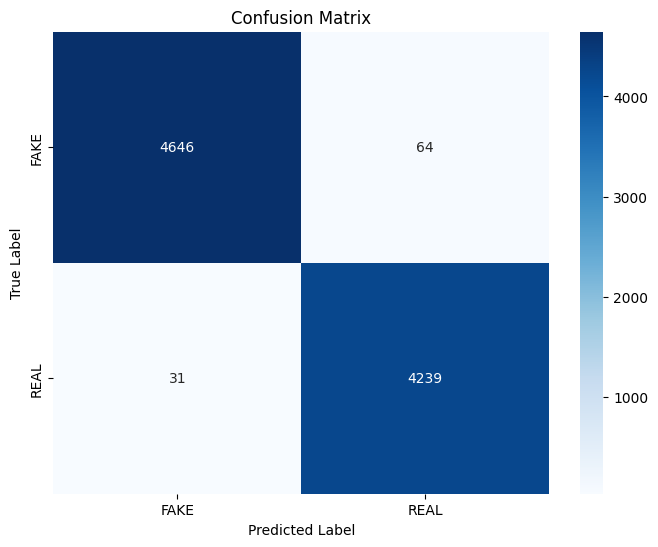


Classification Report:
              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      4710
        REAL       0.99      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Accuracy: 0.9894


In [16]:
# prompt: Train a machine learning model using features derived from NLP techniques. You can use classical models like Logistic Regression or advanced models like LSTMs or transformers. Mini-task:
# Train a simple logistic regression model on the TF-IDF features. Include confusion matrix plot, classification report, accuracy

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming tfidf_matrix and df['label'] are already created from previous steps

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['label'], test_size=0.2, random_state=42)

print("Training the Logistic Regression model...")
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increase max_iter for convergence if needed
model.fit(X_train, y_train)
print("Model training complete.")

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\n--- Model Evaluation ---")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

## **Deployment using Streamlit**

In [17]:
!pip install joblib

In [19]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [20]:
!pip install streamlit pyngrok

In [21]:
# prompt: how can i deploy this model using streamlit

import streamlit as st
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import joblib # To save and load your trained model and vectorizer

# Load spaCy model
# You might need to install 'en_core_web_sm' on the deployment environment
# !python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

# Define preprocessing function (same as in your notebook)
def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# --- Load Model and Vectorizer ---
# IMPORTANT: You need to save your trained tfidf_vectorizer and model
# from your Colab notebook to a file (e.g., using joblib)
# In your Colab notebook, after training:
 #import joblib
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(model, 'logistic_regression_model.pkl')
# Then, download these files and place them in the same directory as your streamlit app script.

try:
    tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
    model = joblib.load('logistic_regression_model.pkl')
except FileNotFoundError:
    st.error("Model or Vectorizer files not found. Please ensure 'tfidf_vectorizer.pkl' and 'logistic_regression_model.pkl' are in the same directory.")
    st.stop() # Stop the app if files are missing

# --- Streamlit App Layout ---

st.title("Fake News Detection System")

st.write("Enter a news headline or short article below to check if it's real or fake.")

# Input text box
user_input = st.text_area("Enter News Text Here:", height=200)

if st.button("Analyze"):
    if user_input:
        # 1. Preprocess the input
        cleaned_input = preprocess(user_input)

        # 2. Vectorize the input using the trained vectorizer
        # Use transform, not fit_transform
        input_vector = tfidf_vectorizer.transform([cleaned_input])

        # 3. Make a prediction
        prediction = model.predict(input_vector)
        prediction_proba = model.predict_proba(input_vector)

        # 4. Display the result
        st.subheader("Analysis Result:")

        predicted_label = prediction[0]
        confidence_real = prediction_proba[0][model.classes_.tolist().index('REAL')]
        confidence_fake = prediction_proba[0][model.classes_.tolist().index('FAKE')]

        if predicted_label == 'REAL':
            st.success(f"Prediction: REAL News 🎉")
            st.info(f"Confidence: {confidence_real:.2f}")
        else:
            st.error(f"Prediction: FAKE News 🚫")
            st.info(f"Confidence: {confidence_fake:.2f}")

        st.write("---")
        st.write("Note: This is a simple model trained on a specific dataset and should not be used as the sole source for verifying news authenticity.")

    else:
        st.warning("Please enter some text to analyze.")



2025-07-22 12:37:27.629 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:37:27.767 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-22 12:37:27.769 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:37:27.772 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:37:27.773 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:37:27.774 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:37:27.775 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:37:27.776 Thread 'MainThread': mi

In [48]:
%%writefile app.py
import streamlit as st
import joblib
import spacy # Import spacy
import pandas as pd # Import pandas (if needed for future expansions)

# Load spaCy model
# You might need to install 'en_core_web_sm' on the deployment environment
# !python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

# Define preprocessing function (same as in your notebook)
def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Load the model and vectorizer
try:
    model = joblib.load("model.pkl")
    vectorizer = joblib.load("vectorizer.pkl")
except FileNotFoundError:
    st.error("Model or Vectorizer files not found. Please ensure 'model.pkl' and 'vectorizer.pkl' are in the same directory.")
    st.stop() # Stop the app if files are missing


st.title("Fake News Detector")

user_input = st.text_area("Enter a news article:")

if st.button("Check if it's fake"):
    if user_input.strip():
        # Preprocess the input using the defined function
        cleaned_input = preprocess(user_input)
        # Vectorize the cleaned input
        vector = vectorizer.transform([cleaned_input])
        # Make prediction
        prediction = model.predict(vector)[0]

        # Display prediction and confidence score (optional, but good practice)
        # To get confidence, you'd need predict_proba and handle model.classes_
        # For simplicity, we'll just show the label for now.
        st.success(f"This news is: **{prediction}**")

    else:
        st.warning("Please enter some text to analyze.")

Overwriting app.py


In [49]:
from pyngrok import ngrok
import os

# Get your ngrok authtoken from https://dashboard.ngrok.com/get-started/your-authtoken
# It's recommended to store your authtoken securely, e.g., in Colab Secrets
from google.colab import userdata
# ngrok_auth_token = userdata.get('NGROK_AUTHTOKEN')
# ngrok.set_auth_token(ngrok_auth_token)

# Replace "YOUR_AUTHTOKEN" with your actual ngrok authtoken if not using Colab Secrets.
# Be cautious about sharing your notebook with the token exposed.
ngrok.set_auth_token("YOUR_AUTHTOKEN") # Uncomment and replace if not using Secrets

# Kill any previous tunnels (optional)
!pkill streamlit

# Open a tunnel on port 8501
# Make sure you have set your ngrok authtoken before this step.
try:
    # Try specifying the tunnel type explicitly and passing the port
    public_url = ngrok.connect(addr=8501, bind_tls=True)
    print(f"Streamlit app is live at: {public_url}")

    # Run the Streamlit app (assuming app.py was created in a previous cell)
    # The &>/dev/null& redirects output to /dev/null and runs in the background
    !streamlit run app.py &>/dev/null&

except Exception as e:
    print(f"An error occurred: {e}")
    print("Please ensure you have set your ngrok authtoken correctly and the tunnel configuration is valid.")

Streamlit app is live at: NgrokTunnel: "https://21e0247bd3fd.ngrok-free.app" -> "http://localhost:8501"


In [30]:
import joblib

# Save the trained model and vectorizer
# Make sure the variable names 'model' and 'tfidf_vectorizer' match those used in your training step
joblib.dump(model, 'model.pkl')
joblib.dump(tfidf_vectorizer, 'vectorizer.pkl')

print("Model and vectorizer saved successfully.")

Model and vectorizer saved successfully.


In [66]:
# Generate a random news article from the dataframe to test the model
import pandas as pd

if 'df' in globals() and isinstance(df, pd.DataFrame) and not df.empty:
    # Sample a random row from the dataframe
    random_article = df.sample(1).iloc[0]

    print("--- Generated News Article for Testing ---")
    print(f"Title: {random_article['title']}")
    print(f"Content:\n{random_article['content']}")
    print(f"\nOriginal Label: {random_article['label']}")
    print("------------------------------------------")
    print("\nCopy the 'Content' above and paste it into your Streamlit app to test the model.")
else:
    print("DataFrame 'df' not found or is empty. Please ensure the dataframe is loaded correctly.")

--- Generated News Article for Testing ---
Title: WATCH TRUMP DELIVER HILARIOUS Message To “Bernie Supporters” Who Tried To Disrupt His MI “Thank You” Rally
Content:
WATCH TRUMP DELIVER HILARIOUS Message To “Bernie Supporters” Who Tried To Disrupt His MI “Thank You” Rally President-elect @realDonaldTrump to protester:  The election ended 3 weeks ago, darling   TCT #Tucker @FoxNews pic.twitter.com/fozZM13tUY  Tucker Carlson (@TuckerCarlson) December 10, 2016

Original Label: FAKE
------------------------------------------

Copy the 'Content' above and paste it into your Streamlit app to test the model.


In [50]:
import pandas as pd

# Assuming X_test, y_test, y_pred, and df are available from previous steps

# Create a DataFrame for easier analysis of test results
results_df = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

# Add the original text content to the results DataFrame
# Need to align the index correctly
# Get the indices of the test set from the original dataframe
test_indices = y_test.index
results_df['content'] = df.loc[test_indices, 'content']
results_df['title'] = df.loc[test_indices, 'title']


# Identify misclassified examples
misclassified_examples = results_df[results_df['actual'] != results_df['predicted']]

print(f"Found {len(misclassified_examples)} misclassified examples in the test set.")

# Display the first 10 misclassified examples
if not misclassified_examples.empty:
    print("\n--- First 10 Misclassified Examples ---")
    for index, row in misclassified_examples.head(10).iterrows():
        print(f"\nIndex in Original DataFrame: {index}")
        print(f"Actual Label: {row['actual']}, Predicted Label: {row['predicted']}")
        print(f"Title: {row['title']}")
        print(f"Content (snippet):\n{row['content'][:500]}...") # Print first 500 characters
        print("-" * 30)
else:
    print("No misclassified examples found.")

Found 95 misclassified examples in the test set.

--- First 10 Misclassified Examples ---

Index in Original DataFrame: 38018
Actual Label: REAL, Predicted Label: FAKE
Title: Trump: Being friends with North Korea's Kim is possible
Content (snippet):
Trump: Being friends with North Korea's Kim is possible HANOI (Reuters) - U.S. President Donald Trump said on Sunday that it was possible he could be friends with North Korean leader Kim Jong Un one day and that it would be  very, very nice  but he was not sure that it would happen. Asked at a news conference in Vietnam if he could see himself being friends with Kim, Trump said:  That might be a strange thing to happen but it s a possibility.   If it did happen it could be a good thing I can tel...
------------------------------

Index in Original DataFrame: 37694
Actual Label: FAKE, Predicted Label: REAL
Title: MEXICO Says They Won’t Build A Wall…Watch Trump Destroy Them With THIS Brilliant Answer [Video]
Content (snippet):
MEXICO Says The

Distribution of Labels:
label
FAKE    23481
REAL    21417
Name: count, dtype: int64


/tmp/ipython-input-46-3185063789.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


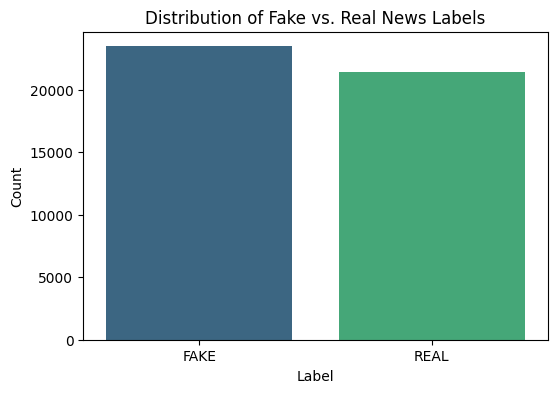

In [46]:
# Step 1: Re-examine Data Balance
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each label
label_counts = df['label'].value_counts()

print("Distribution of Labels:")
print(label_counts)

# Visualize the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Fake vs. Real News Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [47]:
import inspect

# Get the source code of the preprocess function from the current notebook
# This assumes the preprocess function was defined in a previous cell and is available in the current environment
try:
    notebook_preprocess_source = inspect.getsource(preprocess)
except NameError:
    notebook_preprocess_source = "Error: 'preprocess' function not found in notebook environment."

# Read the source code of the app.py file
try:
    with open('app.py', 'r') as f:
        app_py_source = f.read()
except FileNotFoundError:
    app_py_source = "Error: 'app.py' not found."

# Find the preprocess function definition in app.py source
app_preprocess_source = "Error: 'preprocess' function not found in app.py."
if "def preprocess(" in app_py_source:
    # Simple heuristic to find the function block
    start_index = app_py_source.find("def preprocess(")
    end_index = app_py_source.find("\n\n", start_index) # Look for two newlines as potential end of function block
    if end_index == -1:
        end_index = len(app_py_source) # If no double newline, assume rest of file is the function (less reliable)
    app_preprocess_source = app_py_source[start_index:end_index].strip()


print("--- Preprocess function source code (Notebook) ---")
print(notebook_preprocess_source)
print("\n--- Preprocess function source code (app.py) ---")
print(app_preprocess_source)
print("\nCompare the two code blocks above to ensure they are identical.")

--- Preprocess function source code (Notebook) ---
def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)


--- Preprocess function source code (app.py) ---
Error: 'preprocess' function not found in app.py.

Compare the two code blocks above to ensure they are identical.


In [56]:
df['text'][1]

'WASHINGTON (Reuters) - U.S. President Donald Trump removed his chief strategist Steve Bannon from the National Security Council on Wednesday, reversing his controversial decision early this year to give a political adviser an unprecedented role in security discussions. Trump’s overhaul of the NSC, confirmed by a White House official, also elevated General Joseph Dunford, chairman of the Joint Chiefs of Staff and Dan Coats, the director of National Intelligence who heads all 17 U.S. intelligence agencies. The official said the change moves the NSC “back to its core function of what it’s supposed to do.” It also appears to mark a victory for national security adviser H.R. McMaster, who had told some national security experts he felt he was in a “battle to the death” with Bannon and others on the White House staff. Vice President Mike Pence said Bannon would continue to play an important role in policy and played down the shake-up as routine. “This is just a natural evolution to ensure t

## **GITHUB AND MAKING PUBLIC**

## **GITHUB AND MAKING PUBLIC**

### Making your Colab Notebook Public

To share your Colab notebook for a knowledge showcase, you can change its sharing settings:

1.  Open your notebook in Google Colab.
2.  Click the **"Share" button** in the top right corner.
3.  Under "General access", change the setting to **"Anyone with the link"**.
4.  Choose the access level (e.g., "Viewer" or "Commenter").
5.  Click **"Copy link"** and share.

This allows others to view and run your notebook.

### Deploying the Streamlit App Publicly (Continuous Access)

The current `pyngrok` method provides a *temporary* public URL active only while the Colab runtime is running. For a continuous showcase, you would need to deploy your Streamlit app to a hosting platform. Some options include:

*   **Streamlit Community Cloud**
*   **Heroku**
*   **Render**
*   **Cloud providers (GCP, AWS, Azure)**

These platforms require a more formal deployment process.

In [63]:
# Create a requirements.txt file
%%writefile requirements.txt
streamlit
joblib
spacy
pandas
scikit-learn
numpy
en_core_web_sm

# You might need specific spaCy model, add it here if needed, e.g.,
# https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.0/en_core_web_sm-3.7.0.tar.gz
# You'll also need to ensure spaCy downloads the model in the app.py
# Or include the model files in your repo (more complex)
# A common way is to add `en_core_web_sm` to requirements and run
# `python -m spacy download en_core_web_sm` in a post-install script if platform supports it,
# or handle the download within app.py if the model isn't found.
# For simplicity, we'll assume the basic libraries are sufficient for now,
# and you handle spaCy model loading potentially with a check/download in app.py if necessary.

Overwriting requirements.txt
